# 2.1 Keras 학습 분석

이번 실습에서는 모델이 학습하는 동안 변화하는 학습양상을 확인하는 방법을 알아본다

(1) CallBack

(2) History 확인

(3) 틀린 샘플 확인

(4) Confusion Matrix

In [1]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
X_train_flat = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')/255.0
Y_train_onehot = utils.to_categorical(Y_train)
Y_test_onehot = utils.to_categorical(Y_test)

n_in = 28*28
n_out = np.shape(Y_test_onehot)[1]

In [4]:
def DNN_seq(n_in, n_out):
    # Coding Time (5 min) layer : 784 → 128 → 32 → 10, acitvation : relu → relu → softmax
    model = Sequential()
    model.add(Dense(units = 128, input_shape=(n_in,), activation='relu'))
    model.add(Dense(units = 32, activation='relu'))
    model.add(Dense(units = n_out, activation='softmax'))
    return model

model = DNN_seq(n_in, n_out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M1 Max


## (1) Keras Callback
model의 fit() 함수로 학습을 진행하는 동안, 매 epoch마다 지정한 함수를 호출할 수 있음

ModelCheckpoint : 학습 중 모델 저장

EarlyStopping : 학습양상을 보고 학습을 조기에 종료

외에 kereas.callbacks.Callback을 상속받아 원하는 callback 함수를 만들 수 있음
    
https://keras.io/callbacks/

In [5]:
# 학습과정을 저장할 directory 생성
import os
import datetime

def make_dir(path):
    today = str(datetime.date.today())
    path_date = path+'/'+today
    
    if not os.path.exists(path_date):
        os.makedirs(path_date)
    return path_date

In [6]:
model_path=make_dir('./model')

modelconfig = str(n_in)+'_'+str(n_out)
model_name_path = model_path+'/'+modelconfig+"_{epoch:02d}-{loss:.4f}_{val_loss:.4f}_{val_accuracy:.4f}.h5"

print(model_name_path)

./model/2023-04-03/784_10_{epoch:02d}-{loss:.4f}_{val_loss:.4f}_{val_accuracy:.4f}.h5


필요한 callback 함수들을 정의하고 list로 fit() 함수에 전달

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callback list (checkpointer, earlystopper)
checkpointer = ModelCheckpoint(filepath=model_name_path,
                              monitor='val_accuracy',
                              verbose=0,
                              save_best_only=True)
earlystopper = EarlyStopping(monitor='val_accuracy',
                            patience=5,
                            verbose=0,
                            mode='auto')
callback_list = [checkpointer, earlystopper]

# Train (batch : 256, epochs : 50, validation_split : 0.3, verbose : 2, including callback list)
history = model.fit(X_train_flat, Y_train_onehot, batch_size=256, epochs=50, validation_split=0.3, verbose=2, callbacks=callback_list)


Epoch 1/50


2023-04-03 13:30:33.990877: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


165/165 - 2s - loss: 0.5506 - accuracy: 0.8434 - val_loss: 0.2576 - val_accuracy: 0.9283 - 2s/epoch - 12ms/step
Epoch 2/50
165/165 - 1s - loss: 0.2119 - accuracy: 0.9399 - val_loss: 0.1918 - val_accuracy: 0.9454 - 1s/epoch - 9ms/step
Epoch 3/50
165/165 - 1s - loss: 0.1535 - accuracy: 0.9560 - val_loss: 0.1616 - val_accuracy: 0.9537 - 1s/epoch - 9ms/step
Epoch 4/50
165/165 - 2s - loss: 0.1217 - accuracy: 0.9657 - val_loss: 0.1553 - val_accuracy: 0.9562 - 2s/epoch - 9ms/step
Epoch 5/50
165/165 - 1s - loss: 0.1020 - accuracy: 0.9711 - val_loss: 0.1321 - val_accuracy: 0.9611 - 1s/epoch - 9ms/step
Epoch 6/50
165/165 - 1s - loss: 0.0846 - accuracy: 0.9751 - val_loss: 0.1220 - val_accuracy: 0.9648 - 1s/epoch - 9ms/step
Epoch 7/50
165/165 - 1s - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.1155 - val_accuracy: 0.9671 - 1s/epoch - 9ms/step
Epoch 8/50
165/165 - 1s - loss: 0.0593 - accuracy: 0.9836 - val_loss: 0.1128 - val_accuracy: 0.9672 - 1s/epoch - 9ms/step
Epoch 9/50
165/165 - 1s - loss: 0.

In [15]:
os.listdir(model_path)

['784_10_05-0.1020_0.1321_0.9611.h5',
 '784_10_20-0.0093_0.1124_0.9724.h5',
 '784_10_14-0.0249_0.1087_0.9713.h5',
 '784_10_10-0.0441_0.1071_0.9697.h5',
 '784_10_12-0.0342_0.1065_0.9703.h5',
 '784_10_09-0.0509_0.1113_0.9674.h5',
 '784_10_08-0.0593_0.1128_0.9672.h5',
 '784_10_04-0.1217_0.1553_0.9562.h5',
 '784_10_03-0.1535_0.1616_0.9537.h5',
 '784_10_21-0.0097_0.1150_0.9731.h5',
 '784_10_06-0.0846_0.1220_0.9648.h5',
 '784_10_02-0.2119_0.1918_0.9454.h5',
 '784_10_07-0.0697_0.1155_0.9671.h5',
 '784_10_19-0.0108_0.1123_0.9722.h5',
 '784_10_01-0.5506_0.2576_0.9283.h5']

## (2)-1 history를 통한 결과 plotting
fit() 함수는 history 객체를 반환함

history['loss']: epoch 마다 기록되는 train loss

history['accuracy'] : accuracy를 측정할 수 있는 문제이며 compile() 때 metric으로 accuracy를 지정하였다면 기록됨
    
history['val_loss'] : 검증 데이터가 있다면 기록되는 validation loss

history['val_accuracy'] : 검증 데이터가 있고 accuracy를 측정할 수 있다면 기록되는 validation accuracy 

In [16]:
print(history.history['loss'])
print(history.history['val_accuracy'])

[0.550624430179596, 0.2118997424840927, 0.15349015593528748, 0.12173964083194733, 0.10202062129974365, 0.08464638143777847, 0.06967052817344666, 0.05928677320480347, 0.05091331899166107, 0.04408344626426697, 0.03701414912939072, 0.034161292016506195, 0.028834544122219086, 0.02488272450864315, 0.021885117515921593, 0.018788741901516914, 0.01537433173507452, 0.015039901249110699, 0.010759314522147179, 0.009348359890282154, 0.009695068001747131, 0.006826202385127544, 0.005442293826490641, 0.004900357685983181, 0.005206461064517498, 0.0037569894921034575]
[0.9283333420753479, 0.9454444646835327, 0.9537222385406494, 0.9562222361564636, 0.9610555768013, 0.9647777676582336, 0.9670555591583252, 0.9671666622161865, 0.9674444794654846, 0.9696666598320007, 0.9688888788223267, 0.9703333377838135, 0.9703333377838135, 0.9713333249092102, 0.9711666703224182, 0.9711666703224182, 0.9706667065620422, 0.9694444537162781, 0.9721666574478149, 0.9723889231681824, 0.9730555415153503, 0.9703888893127441, 0.97

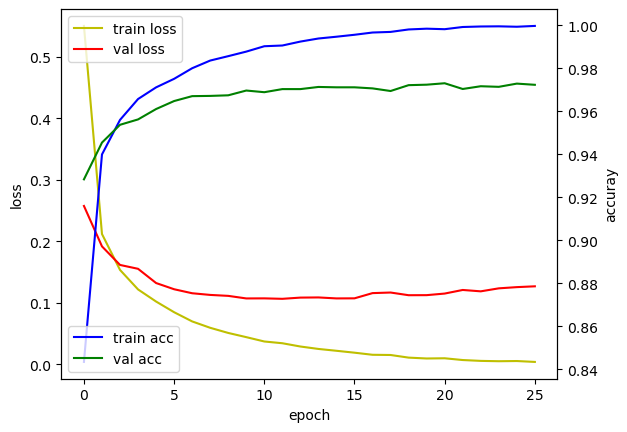

In [17]:
# matplotlib를 이용하여 history 객체 내부에 저장된 값들을 graph로 표현
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 저장하고 싶을 경우
#fig.savefig('final.png')

## (3) 틀린샘플 찾기

real_label : 5, predict_label: 6


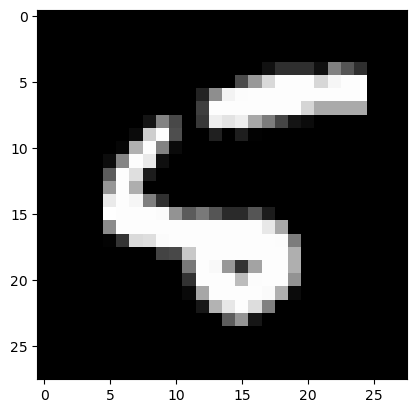

real_label : 4, predict_label: 9


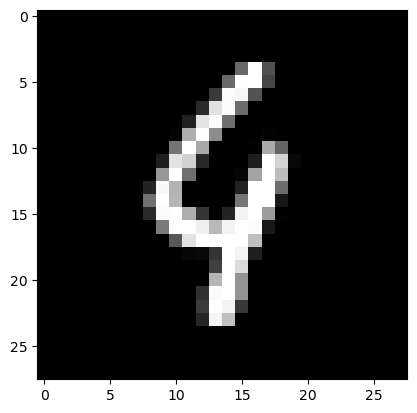

real_label : 8, predict_label: 3


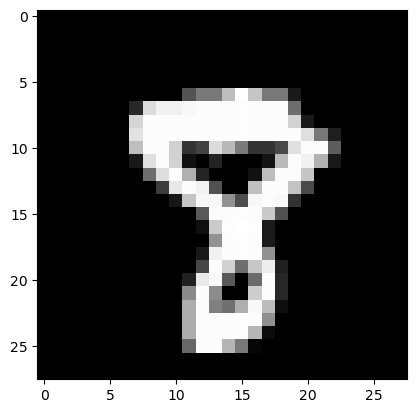

real_label : 4, predict_label: 2


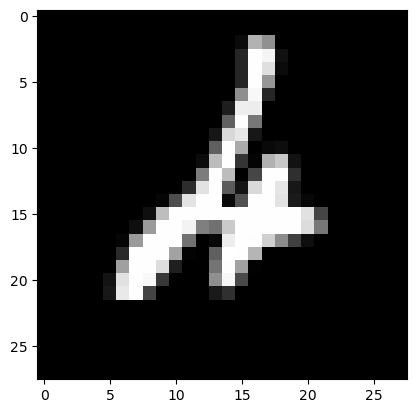

real_label : 9, predict_label: 3


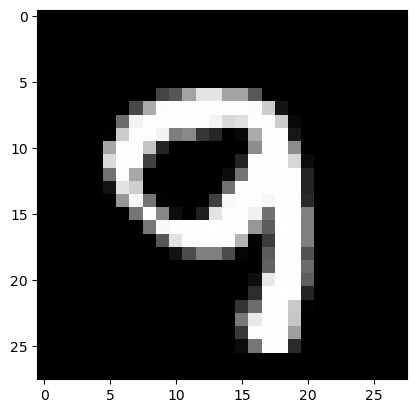

In [18]:
def check_error(Number_Of_Error):
    
    # Coding Time
    cnt = 0
    for i in range(len(Y_test)):
        test_data = X_test[i].reshape(1, 28*28)
        pred_y = model.predict(test_data, verbose=0)
        pred_y = pred_y.argmax()
        
        if pred_y != Y_test[i]:
            print('real_label : {}, predict_label: {}'.format(Y_test[i], pred_y))
            plt.imshow(X_test[i], cmap='gray')
            plt.show()
            cnt+=1
            
        if cnt >= Number_Of_Error:
            break
check_error(5)

## (4) Confusion Matrix 만들기 with pandas

In [20]:
import pandas as pd

# Coding Time
#X_test_flat, batch_size 활용하여 predict된 결과 list 만들기
pred_y = model.predict(X_test_flat, batch_size=10000, verbose=0)
Y_pred = [x.argmax() for x in pred_y]
# Pandas를 활용하여 confusion matrix 만들기 
data = {'Real':Y_test,'Predict': Y_pred}
df=pd.DataFrame(data, columns=['Real', 'Predict'])
conf_mat = pd.crosstab(df['Real'], df['Predict'], rownames=['Real'], colnames=['Predict'])
print(conf_mat)

Predict    0     1     2    3    4    5    6    7    8    9
Real                                                       
0        969     0     1    2    0    1    2    1    3    1
1          0  1120     3    3    0    0    1    1    7    0
2          3     2  1007    6    1    1    3    2    7    0
3          0     0     1  991    0    4    0    3    6    5
4          3     0     5    1  956    0    1    3    2   11
5          4     0     0   14    1  861    6    0    4    2
6          4     4     1    1    4    4  938    0    2    0
7          0     5    12    5    0    1    0  988    2   15
8          1     0     4   17    4    4    4    3  932    5
9          2     4     0    8    5    3    1    4    1  981
